# Kinetics Data Analysis Notebook

In this notebook, you will read in your data from a simplified CSV file and process it in order to determine the rate of reaction, orders of the reaction with respect to the reactants, rate constants for different mixtures and temperatures, and the activation energy & pre-exponential factor from the Arrhenius equation. Reference values for these parameters were reported in:

Yao *et al.*, *ChemistrySelect*, **2019**, *4*, 5116, doi: 10.1002/slct.201900527.

BEFORE YOU START: Format your data! In order to use this tool, your data must be in CSV format with the time in the first column, and the absorbance for each mixture in subsequent columns. It is ok if your time column extends past the absorbance for a particular mixture as this will be handled below.

In [1]:
# Import needed libraries for data analysis
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from google.colab import files

# Helper Functions & Fundamental Constants
Execute this group of cells to prepare the Helper Functions for data analysis.

**You should not be modifying anything in this section!**

This section contains useful functions and constants to accomplish the goals of the notebook.

In [47]:
# raw data processing function
def process_csv_to_ndarray(csv_file):
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(csv_file)

    # Initialize a list to hold the ndarrays for each data pair
    data_pairs = []

    # Loop over all mix columns (we assume the first column is 'time')
    for column in df.columns[1:]:
        # Drop NaN values from the time and mix columns
        time_clean = df[df.columns[0]].dropna()
        mix_clean = df[column].dropna()

        # Ensure both time and mix columns have the same length
        min_len = min(len(time_clean), len(mix_clean))
        time_clean = time_clean.iloc[1:min_len].values
        mix_clean = mix_clean.iloc[1:min_len].values

        # Create an ndarray for the current time and mix pair
        pair_ndarray = np.column_stack((time_clean, mix_clean))
        data_pairs.append(pair_ndarray)

    # return an object with {time, abs} pairs for each mixture
    return np.array(data_pairs, dtype=object)

# create a single plot with all data pairs plotted together
def plot_composite(data_pairs):
    plt.figure(figsize=(10, 6))  # Create a figure with custom size

    # Loop over each data set in data_pairs and plot it
    for i, data in enumerate(data_pairs):
        time = data[:, 0]    # First column is time
        absorbance = data[:, 1]  # Second column is absorbance (mix data)

        # Plot each mix data set with a label for the legend
        plt.plot(time, absorbance, label=f'Mix {i + 1}', marker='o')

    # Add labels and title
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Absorbance', fontsize=14)
    plt.title('Composite Plot of Absorbance over Time', fontsize=16)

    # Show the legend to differentiate between each mix
    plt.legend(title='Data Sets')

    # Display the plot
    plt.grid(True)  # Optionally add grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# create a single plot with for one data set
def plot_dataset(data_pairs, mix_label="Mix 1"):
    plt.figure(figsize=(5, 3))  # Create a figure with custom size

    # Loop over each data set in data_pairs and plot it
    time = data_pairs[:, 0]    # First column is time
    absorbance = data_pairs[:, 1]  # Second column is absorbance (mix data)

    # Plot each mix data set with a label for the legend
    plt.plot(time, absorbance, label=mix_label, marker='o')

    # Add labels and title
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Absorbance', fontsize=14)

    # Show the legend to differentiate between each mix
    # plt.legend(title='Data Sets')

    # Display the plot
    plt.grid(True)  # Optionally add grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# for fitting {time,abs} data to determine slope and intercept
def linear_fit(time_abs_pair):
    # Extract time and absorbance values from the input data
    time = time_abs_pair[:, 0]
    absorbance = time_abs_pair[:, 1]

    # Perform a linear fit using numpy's polyfit function
    slope, intercept = np.polyfit(time, absorbance, 1)  # Degree 1 for linear fit

    return slope, intercept

# Define the Arrhenius function
def arrhenius_equation(T, A, Ea):
    """Arrhenius equation: k = A * exp(-Ea / (R * T))"""
    R = 8.314 # J/(mol K)
    return A * np.exp(-Ea / (R * T))

# Instructions

Execute the cells below to perform the a linear fitting of the absorbance vs time data collected during your experiment. From the fit you should be able to determine the rate of the reaction which is a key ingredient to calculating the order of the reaction with respect to each reactant, and the rate constant for each mixture and/or temperature.

Once the rate constants are known, a nonlinear fit of the Arrhenius equation can be performed to determine the activation energy of iodination and the pre-exponential factor.

# Import Experimental Data - CSV

Execute the cell below, select the data file you wish to analyze, and then proceed with the subsequent steps.

In [3]:
# Step 1: Upload data file
uploaded = files.upload()

# Step 2: Retrieve the file name
file_name = list(uploaded.keys())[0]

# Step 3: Print the file name
print(f"Uploaded file name: {file_name}")

Saving kinetics - sample data - Spring 2024.csv to kinetics - sample data - Spring 2024.csv
Uploaded file name: kinetics - sample data - Spring 2024.csv


# Create DataFrame, split the data into {time,abs} pairs, plot the subsequent data.

Follow along with your instructor as you use the helper functions to split the imported data and make a plot of the all the data.

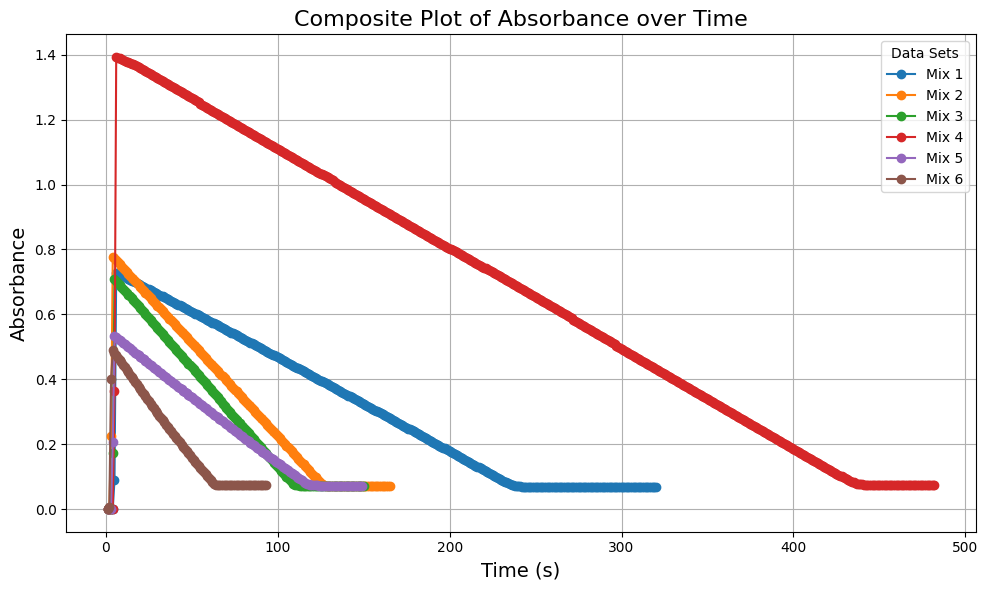

In [4]:
# Step 4: process the imported data
processed_data = process_csv_to_ndarray(file_name)

# Step 5: plot the data
plot_composite(processed_data)

# Select data to fit for each trial and perform a linear fit of the data

Follow the steps below to generate the code needed to analyze each trial individually. The steps are:
 1. plot a single trial
 2. determine the start and end times over which to perform a linear fit (avoid the discontinuities in the data)
 3. perform a linear fit to determine the slope (proportional to the rate) and intercept ($A_0$) of the data which can then be used to calculate the rate of the reaction

Execute the cell below to set the *ratelist* variable as an empty list so that it can be appended with the rates you calculate below. Then perform the steps above *for each mixture*.

In [7]:
ratelist = []

## Mixture 1
Initial concentration of iodine = 0.001 M

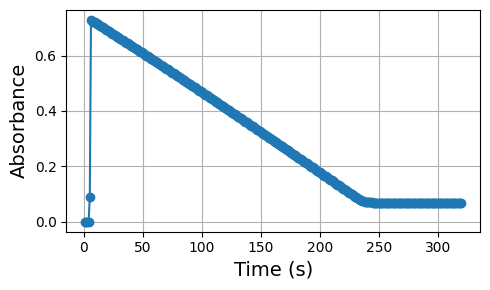

In [5]:
# Specify which data set to work with and the initial concentration
dataset_to_fit = 0
initial_concentration = 0.001

# Step 6a: Plot a single trial
plot_dataset(processed_data[dataset_to_fit], f"Mix {dataset_to_fit + 1}")

In [8]:
# Step 6b: select start and end times to use for linear fitting, and extract data
start_time = 20
end_time = 225

selected_data = processed_data[dataset_to_fit][start_time-1:end_time]

# Step 6c: perform a linear fit of the selected data
trial_slope, trial_A0 = linear_fit(selected_data)

# Step 6d: calculate the rate of the reaction and store the result
trial_rate = -initial_concentration * trial_slope / trial_A0
print(f'Rate for Mix {dataset_to_fit+1} : {trial_rate:.5e}')
ratelist.append(trial_rate)

Rate for Mix 1 : 3.80729e-06


## Mixture 2
Initial concentration of iodine = 0.001 M

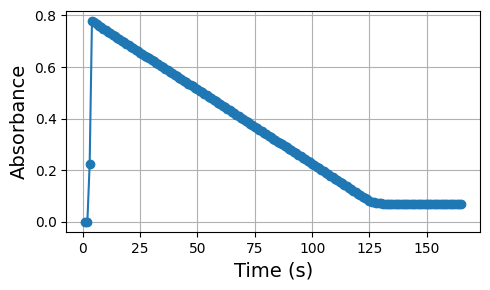

In [10]:
# Specify which data set to work with and the initial concentration
dataset_to_fit = 1
initial_concentration = 0.001

# Step 6a: Plot a single trial
plot_dataset(processed_data[dataset_to_fit], f"Mix {dataset_to_fit + 1}")

In [11]:
# Step 6b: select start and end times to use for linear fitting, and extract data
start_time = 20
end_time = 115

selected_data = processed_data[dataset_to_fit][start_time-1:end_time]

# Step 6c: perform a linear fit of the selected data
trial_slope, trial_A0 = linear_fit(selected_data)

# Step 6d: calculate the rate of the reaction and store the result
trial_rate = -initial_concentration * trial_slope / trial_A0
print(f'Rate for Mix {dataset_to_fit+1} : {trial_rate:.5e}')
ratelist.append(trial_rate)

Rate for Mix 2 : 7.19363e-06


## Mixture 3
Initial concentration of iodine = 0.001 M

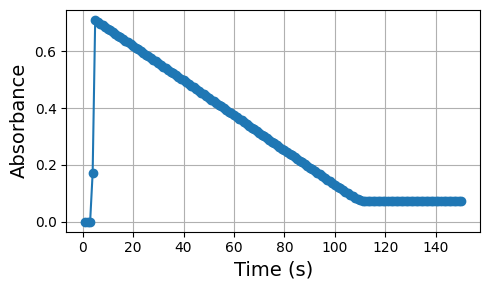

In [12]:
# Specify which data set to work with and the initial concentration
dataset_to_fit = 2
initial_concentration = 0.001

# Step 6a: Plot a single trial
plot_dataset(processed_data[dataset_to_fit], f"Mix {dataset_to_fit + 1}")

In [13]:
# Step 6b: select start and end times to use for linear fitting, and extract data
start_time = 15
end_time = 90

selected_data = processed_data[dataset_to_fit][start_time-1:end_time]

# Step 6c: perform a linear fit of the selected data
trial_slope, trial_A0 = linear_fit(selected_data)

# Step 6d: calculate the rate of the reaction and store the result
trial_rate = -initial_concentration * trial_slope / trial_A0
print(f'Rate for Mix {dataset_to_fit+1} : {trial_rate:.5e}')
ratelist.append(trial_rate)

Rate for Mix 3 : 8.25714e-06


## Mixture 4
Initial concentration of iodine = 0.002 M

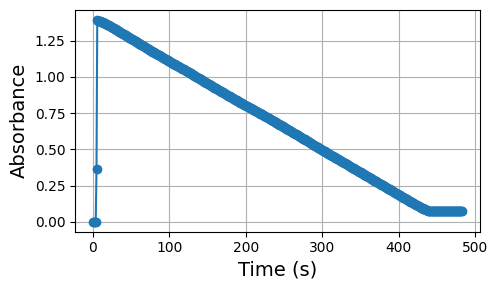

In [14]:
# Specify which data set to work with and the initial concentration
dataset_to_fit = 3
initial_concentration = 0.002

# Step 6a: Plot a single trial
plot_dataset(processed_data[dataset_to_fit], f"Mix {dataset_to_fit + 1}")

In [15]:
# Step 6b: select start and end times to use for linear fitting, and extract data
start_time = 15
end_time = 410

selected_data = processed_data[dataset_to_fit][start_time-1:end_time]

# Step 6c: perform a linear fit of the selected data
trial_slope, trial_A0 = linear_fit(selected_data)

# Step 6d: calculate the rate of the reaction and store the result
trial_rate = -initial_concentration * trial_slope / trial_A0
print(f'Rate for Mix {dataset_to_fit+1} : {trial_rate:.5e}')
ratelist.append(trial_rate)

Rate for Mix 4 : 4.34136e-06


## Mixture 5 : Mixture 1 @ 30$^{\circ}$ C

Initial concentration of iodine = 0.001 M

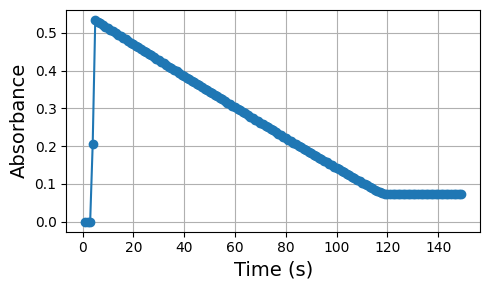

In [18]:
# Specify which data set to work with and the initial concentration
dataset_to_fit = 4
initial_concentration = 0.001

# Step 6a: Plot a single trial
plot_dataset(processed_data[dataset_to_fit], f"Mix {dataset_to_fit + 1}")

In [19]:
# Step 6b: select start and end times to use for linear fitting, and extract data
start_time = 15
end_time = 115

selected_data = processed_data[dataset_to_fit][start_time-1:end_time]

# Step 6c: perform a linear fit of the selected data
trial_slope, trial_A0 = linear_fit(selected_data)

# Step 6d: calculate the rate of the reaction and store the result
trial_rate = -initial_concentration * trial_slope / trial_A0
print(f'Rate for Mix {dataset_to_fit+1} : {trial_rate:.5e}')
ratelist.append(trial_rate)

Rate for Mix 5 : 7.42122e-06


## Mixture 6 : Mixture 1 @ 40$^{\circ}$ C

Initial concentration of iodine = 0.001 M

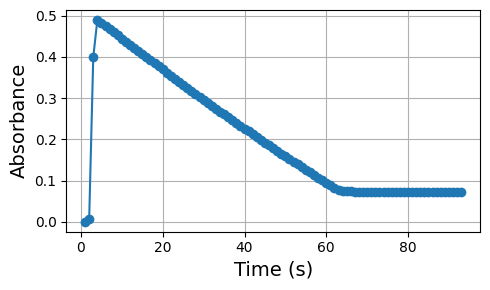

In [20]:
# Specify which data set to work with and the initial concentration
dataset_to_fit = 5
initial_concentration = 0.001

# Step 6a: Plot a single trial
plot_dataset(processed_data[dataset_to_fit], f"Mix {dataset_to_fit + 1}")

In [21]:
# Step 6b: select start and end times to use for linear fitting, and extract data
start_time = 10
end_time = 60

selected_data = processed_data[dataset_to_fit][start_time-1:end_time]

# Step 6c: perform a linear fit of the selected data
trial_slope, trial_A0 = linear_fit(selected_data)

# Step 6d: calculate the rate of the reaction and store the result
trial_rate = -initial_concentration * trial_slope / trial_A0
print(f'Rate for Mix {dataset_to_fit+1} : {trial_rate:.5e}')
ratelist.append(trial_rate)

Rate for Mix 6 : 1.37720e-05


## Summary Table of Rates for Mixtures 1-6

In [26]:
# Summary Table of Rates for Mixtures 1-6
for i,rate in enumerate(ratelist):
  # print the result for each Mixture
  print(f"Rate for Mix {i + 1} : {rate:.4e}")

Rate for Mix 1 : 3.8073e-06
Rate for Mix 2 : 7.1936e-06
Rate for Mix 3 : 8.2571e-06
Rate for Mix 4 : 4.3414e-06
Rate for Mix 5 : 7.4212e-06
Rate for Mix 6 : 1.3772e-05


# Determining Orders of the Reaction in [Acetone], [HCl], and [I$_2$]

Complete the steps below in order to utilize your rate data for calculating the rate law exponents of the reactants.

**Remember to round your exponent values to the nearest whole number before calculating the rate constants below!**

## Determining m - Acetone Rate Law Exponent - Mixtures 1 & 2

Using your data from Trials 1 & 2 you are able to determine the order of the reaction with respect to acetone since these two trials only differ in their concentrations of acetone. By forming a ratio of the rates of these two trials we have:

$\frac{\text{Rate}_3}{\text{Rate}_1}
=
\frac{k \left[\text{Acetone}\right]_2^m \left[\text{HCl}\right]^n\left[I_2\right]^p}{k \left[\text{Acetone}\right]_1^m \left[\text{HCl}\right]^n\left[I_2\right]^p}=\left(\frac{\left[\text{Acetone}\right]_2}{\left[\text{Acetone}\right]_1}\right)^m
$

which we can then take a natural logarithm of in order to isolate the exponent m:

$m =
\frac{\text{Log}(\text{Rate}_2/{\text{Rate}_1})}{\text{Log}\left(\left[\text{Acetone}\right]_2/\left[\text{Acetone}\right]_1\right)}
$

Furthermore, since we doubled the concentration of acetone in Mixture 2, the denominator becomes:

$m =
\frac{\text{Log}(\text{Rate}_2/{\text{Rate}_1})}{\text{Log}\left(2\right)}
$

In [29]:
# Step 7: determine the rate law exponent for acetone using the formula above.
m_value = np.log(ratelist[1]/ratelist[0]) / np.log(2)

print(f"The rate law exponent for acetone, m = {m_value:.4f}")

The rate law exponent for acetone, m = 0.9180


## Determining n - HCl Rate Law Exponent - Mixtures 1 & 3

Using your data from Trials 1 & 3 you are able to determine the order of the reaction with respect to acetone since these two trials only differ in their concentrations of acetone. By forming a ratio of the rates of these two trials we have:

$\frac{\text{Rate}_3}{\text{Rate}_1}
=
\frac{k \left[\text{Acetone}\right]^m \left[\text{HCl}\right]_3^n\left[I_2\right]^p}{k \left[\text{Acetone}\right]^m \left[\text{HCl}\right]_1^n\left[I_2\right]^p}=\left(\frac{\left[\text{HCl}\right]_3}{\left[\text{HCl}\right]_1}\right)^n
$

which we can then take a natural logarithm of in order to isolate the exponent m:

$n =
\frac{\text{Log}(\text{Rate}_3/{\text{Rate}_1})}{\text{Log}\left(\left[\text{HCl}\right]_3/\left[\text{HCl}\right]_1\right)}
$

In [30]:
# Step 7: determine the rate law exponent for HCl using the formula above.
n_value = np.log(ratelist[2]/ratelist[0]) / np.log(2)

print(f"The rate law exponent for HCl, n = {n_value:.4f}")

The rate law exponent for HCl, n = 1.1169


## Determining p - Iodine Rate Law Exponent - Mixtures 1 & 4

Using your data from Trials 1 & 4 you are able to determine the order of the reaction with respect to acetone since these two trials only differ in their concentrations of acetone. By forming a ratio of the rates of these two trials we have:

$\frac{\text{Rate}_4}{\text{Rate}_1}
=
\frac{k \left[\text{Acetone}\right]^m \left[\text{HCl}\right]^n\left[I_2\right]^p_4}{k \left[\text{Acetone}\right]^m \left[\text{HCl}\right]^n\left[I_2\right]^p_1}=\left(\frac{\left[(I_2)\right]_4}{\left[(I_2)\right]_1}\right)^p
$

which we can then take a natural logarithm of in order to isolate the exponent m:

$p =
\frac{\text{Log}(\text{Rate}_4/{\text{Rate}_1})}{\text{Log}\left(\left[I_2\right]_4/\left[I_2\right]_1\right)}
$

In [31]:
# Step 7: determine the rate law exponent for acetone using the formula above.
p_value = np.log(ratelist[3]/ratelist[0]) / np.log(2)

print(f"The rate law exponent for acetone, p = {p_value:.4f}")

The rate law exponent for acetone, p = 0.1894


# Determining the rate constants, k, for each Mixture

Follow the steps below in order to determine the rate constants, $k$, for each of your Mixtures. While the value is constant, in principle, for a fixed temperature, experimental error will lead to differing results from each trial.

Once you have determined the orders for each of the reactants, you can finally calculate the rate constant for each of your trials.  Modify the rate law below to reflect the actual values of *m*, *n*, and *p*. You will use this to finish your calculations.

$
		Rate = k \left[\text{Acetone}\right]^m \left[\text{HCl}\right]^n\left[I_2\right]^p
$

Once you have your rate law finalized, solve the expression for the unknown rate constant, *k*. Use this equation to calculate the rate constants for each of your trials. Note: you can reference the rates from ratelist using list reference if you know which trial you're interested in. For Mixture #1, ratelist[[0]], Mixture #2, ratelist[[1]], and so on in increasing numerical order.

In [32]:
# Step 8 : calculate the rate constants for each of the Mixtures using the equation k = Rate / ([acetone] * [HCl])

k1 = ratelist[0]/(0.8 * 0.2)
k2 = ratelist[1]/(1.6 * 0.2)
k3 = ratelist[2]/(0.8 * 0.4)
k4 = ratelist[3]/(0.8 * 0.2)
k5 = ratelist[4]/(0.8 * 0.2)
k6 = ratelist[5]/(0.8 * 0.2)

for i,kvalue in enumerate([k1,k2,k3,k4,k5,k6]):
  print(f"Mixture {i+1} - k value = {kvalue:.4e}")


Mixture 1 - k value = 2.3796e-05
Mixture 2 - k value = 2.2480e-05
Mixture 3 - k value = 2.5804e-05
Mixture 4 - k value = 2.7133e-05
Mixture 5 - k value = 4.6383e-05
Mixture 6 - k value = 8.6075e-05


# Determine Activation Energy through nonlinear fitting

The rate constant, *k*, is only constant for a given temperature, otherwise this "constant" is really a function of temperature. This temperature dependence is difficult to describe from first principles, but tends to follow an Arrhenius behavior for many chemical reactions. As a result, the temperature dependence of the rate constant is:

$
k(T) = A \,e^{-\frac{E_a}{R \,T}}
$

where *A* is a pre-exponential factor (units depend on the reaction, can be temperature dependent), $E_a$ is the activation energy (in J/mol), *R* is the universal gas constant (8.314 J/(mol K)), and *T* is the temperature (in Kelvin) at which the reaction takes place.

Since you measured the rate constant of Mixture #1 at three temperatures, we can perform a nonlinear fit of the data to this functional form in order to extract the activation energy and pre-exponential factor.

## Input temperature data in order to fit the Arrhenius equation

Before we can perform a nonlinear fit, we need to create a list with the temperature points and a second list with the rate constant data for each of the temperatures utilized in the experiment.

**Note: the temperatures must be in Kelvin!**

In [48]:
# Step 9 : combine the rate constants and temperatures into list to use for fitting.
T_values = np.array([10,30,40]) + 273.15
k_values = np.array([k1, k5, k6])

print(f"The temperature list is : {T_values}")
print(f"The rate constant list is : {k_values}")

The temperature list is : [283.15 303.15 313.15]
The rate constant list is : [2.37955763e-05 4.63826148e-05 8.60747500e-05]


## Perform the nonlinear fit to determine activation energy and pre-exponential factor

We will use scipy.optimize.curve_fit to perform the nonlinear fit. This function requires several ingredients:
 1. a pre-defined python function for the Arrhenius equation (available as *arrhenius_equation*)
 2. the temperature values
 3. the rate constants at those temperatures
 4. the initial guesses for *A* and $E_a$

Follow along with your instructor as you build up these ingredients.

In [52]:
# Step 10 : set the initial values for the fit parameters, and perform the fit
A_Ea_initial_guess = [1e4, 20000]
params, covariance = curve_fit(arrhenius_equation, T_values, k_values, p0=A_Ea_initial_guess)

# Step 11 : Extract fitted parameters and uncertainties
A_fitted, Ea_fitted = params
A_uncertainty, Ea_uncertainty = np.sqrt(np.diag(covariance))

# Print the results
print(f"Fitted Pre-exponential Factor (A): {A_fitted:.4e} ± {A_uncertainty:.4e}")
print(f"Fitted Activation Energy (Ea): {Ea_fitted:.2f} ± {Ea_uncertainty:.2f} J/mol")

Fitted Pre-exponential Factor (A): 1.1988e+02 ± 4.3924e+02
Fitted Activation Energy (Ea): 36910.29 ± 9419.45 J/mol


## Plot the Arrhenius fit and the data together

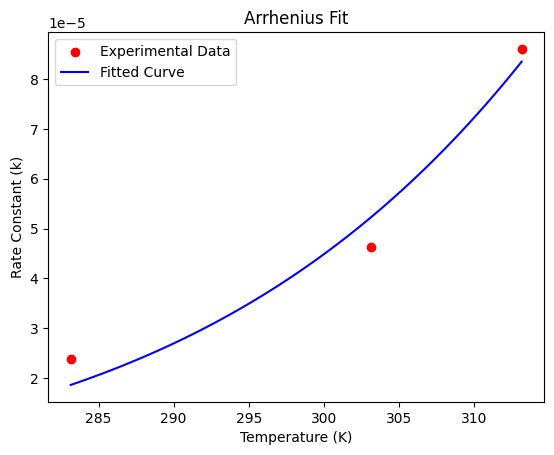

In [53]:
# Plot the data and the fit
T_fit = np.linspace(min(T_values), max(T_values), 100)  # Generate points for smooth curve
k_fit = arrhenius_equation(T_fit, A_fitted, Ea_fitted)

plt.scatter(T_values, k_values, color='red', label='Experimental Data')
plt.plot(T_fit, k_fit, label='Fitted Curve', color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('Rate Constant (k)')
plt.legend()
plt.title('Arrhenius Fit')
plt.show()